In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import wikipedia

In [ ]:
titles = [
    'Linear algebra',
    'Data Science',
    'Artificial intelligence',
    'European Central Bank',
    'Financial technology',
    'International Monetary Fund',
    'Basketball',
    'Swimming',
    'Cricket'
]

In [ ]:
class KMeans():
    def __init__(
        self,
        x_train,
        y_train,
        num_clusters=3,
        max_iter=100,
        tol=1e-4,
        seed: str = None,
    ):
        """
        Initialize KMeans object.
        Arguments:
            dataset: numpy array of shape (n_samples, n_features)
            k: number of clusters
            max_iter: maximum number of iterations
            tol: tolerance for convergence
            seed: initial cluster centroids choice ['random','cluster']
        """
        self.dataset = x_train
        self.targets = y_train

        self.k = num_clusters
        self.max_iter = max_iter
        self.tol = tol

        self.num_features = x_train.shape[1]
        self.num_samples = x_train.shape[0]
        self.losses = []

        if seed == "random":
            self.centroids = np.random.uniform(
                size=(self.k, self.num_features))
        elif seed == "cluster":
            if (self.k > self.num_samples):  # hack for large k
                self.centroids = np.copy(self.dataset[np.random.choice(
                    self.num_samples, self.k, replace=True)])
            else:
                self.centroids = np.copy(self.dataset[np.random.choice(
                    self.num_samples, self.k, replace=False)])
        else:
            raise ValueError("seed must be in ['random', 'cluster']")
        # store old centroids for convergence check
        self.old_centroids = np.copy(self.centroids)
        # store cluster assignment indexes
        self.cluster_labels = np.zeros(self.num_samples, dtype=int)
        self.assign_clusters()

    def converged(self):
        return np.all(np.linalg.norm(self.centroids - self.old_centroids, ord=2, axis=1) < self.tol)

    def assign_clusters(self):
        for i in range(self.num_samples):
            self.cluster_labels[i] = np.argmin(
                np.linalg.norm(self.dataset[i]-self.centroids, ord=2, axis=1))

    def fit(self, verbose=False):
        for i in range(self.max_iter):
            self.assign_clusters()
            self.update_centroids()
            loss = self.calc_loss()
            self.losses.append(loss)
            if verbose:
                print(f"Iteration {i+1} Loss: {loss}")
                print("---------------------------")
            if self.converged():
                print(f"Total Iterations: {i+1}, Loss: {loss}")
                break
            self.old_centroids = np.copy(self.centroids)

    def calc_loss(self):
        loss = np.mean(np.square(np.linalg.norm(
            self.dataset - self.centroids[self.cluster_labels], ord=2, axis=1)), axis=0)
        return loss

    def update_centroids(self):
        for i in range(self.k):
            alloted = self.dataset[self.cluster_labels == i]
            if len(alloted) > 0:
                self.centroids[i] = np.mean(alloted, axis=0)
            else:
                self.centroids[i] = np.zeros(self.num_features)


In [ ]:
def load_data():
    articles = [wikipedia.page(
        title, preload=True).content for title in titles]
    vectorizer = TfidfVectorizer(stop_words={'english'})
    x_train = vectorizer.fit_transform(articles).toarray()
    y_train = np.arange(len(titles))

    return (x_train, y_train), vectorizer

In [ ]:
def main():
    (x_train, y_train),_ = load_data()
    print("Data loaded, Finding Clusters ...")
    k = [6]
    losses = []
    for num_clusters in k:
        kmeans = KMeans(x_train, y_train, num_clusters=num_clusters,
                        seed='cluster', tol=1e-7, max_iter=100)
        kmeans.fit(verbose=False)
        print("Clusters found, printing results ...")
        losses.append(kmeans.calc_loss())
        clusters = [[] for i in range(num_clusters)]
        for i, title in enumerate(titles):
            index = kmeans.cluster_labels[i]
            clusters[index].append(title)
        print("Clusters:")
        for i, cluster in enumerate(clusters):
            print("Cluster {}: {}".format(i, cluster))


In [11]:
(x_train, y_train),_ = load_data()

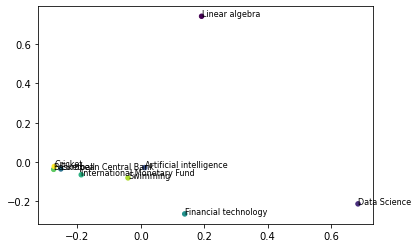

In [20]:
# do PCA on the data
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(x_train)
# plot the data and label them with the titles 
import matplotlib.pyplot as plt
plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train,s = 20)
for i,title in enumerate(titles):
    plt.annotate(title, (x_train_pca[i,0], x_train_pca[i,1]),size = 8)
plt.show()
